# Assignment-2 

In [63]:
import numpy as np
from matplotlib import pyplot as plt 
from sympy import *

In [46]:
def cov_inv(w):
    w_cov=np.cov(w.transpose())
    return w_cov,np.linalg.inv(w_cov)
def get_mean(w):
    return np.mean(w,axis=0)
def get_X():
    x,y=symbols('x y')
    X=np.array([x,y]).transpose()
    return x,y,X
def get_equation(X,w_mean,w_cov,w_inv,pw):
    c1=-0.5*(np.dot(np.subtract(X,w_mean).transpose(),np.dot(w_inv,np.subtract(X,w_mean))))
    c2=-(w_cov.shape[0]/2)*np.log(2*np.pi)
    c3=-0.5*np.log(np.linalg.det(w_cov))
    c4=np.log(pw)
    return c1+c2+c3+c4

def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)
    
def plot(w1,w2,g,x,y):
    p1 = plot_implicit(g, (x, -20, 20), (y, -20, 20), show=False)
    fig, ax = plt.subplots()
    move_sympyplot_to_axes(p1, ax)
    plt.setp(ax.yaxis.get_label(), 'rotation', 0)
    plt.scatter([x[0] for x in w1 ],[x[1] for x in w1 ],label="Class W1")
    plt.scatter([x[0] for x in w2 ],[x[1] for x in w2 ],label="Class W2")
    plt.title(label='Decision Boundary', fontsize='20', pad='20')

    plt.legend()
    plt.show()


In [59]:
def get_result(w1,w2,pw1,pw2):
    w1_cov,w1_inv=cov_inv(w1)
    w2_cov,w2_inv=cov_inv(w2)
    w1_mean=get_mean(w1)
    w2_mean=get_mean(w2)
    x,y,X=get_X()
    g1=get_equation(X,w1_mean,w1_cov,w1_inv,pw1)
    g2=get_equation(X,w2_mean,w2_cov,w2_inv,pw2)
    g=g1-g2
    if((w1_cov==w2_cov).all() and (w1_cov[0][1]==0 and w1_cov[1][0]==0)):
        print("Following are the covariance matrix of the given classes:\n\nClass W1 Covariance Matrix:\n",w1_cov,"\n\nClass W2 Covariance Matrix:\n",w2_cov,"\n\nCase_1 of Baye's Decision Boundary(Since Covariance Matrices are equal and of form 1):\n")
    elif((w1_cov==w2_cov).all()):
        print("Following are the covariance matrix of the given classes:\n\nClass W1 Covariance Matrix:\n",w1_cov,"\n\nClass W2 Covariance Matrix:\n",w2_cov,"\n\nCase_2 of Baye's Decision Boundary(Since Covariance Matrices are equal but not of form 1):\n")
    else:
        print("Following are the covariance matrix of the given classes:\n\nClass W1 Covariance Matrix:\n",w1_cov,"\n\nClass W2 Covariance Matrix:\n",w2_cov,"\n\nCase_3 of Baye's Decision Boundary(Since Covariance Matrices are not equal):\n")

    plot(w1,w2,g,x,y)
    
    
    
    

# Question 1
Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2)

ω1 = [1,6; 3,4; 3,8; 5,6]

ω2 = [3,0; 1,-2; 3,-4; 5,-2]

Following are the covariance matrix of the given classes:

Class W1 Covariance Matrix:
 [[2.66666667 0.        ]
 [0.         2.66666667]] 

Class W2 Covariance Matrix:
 [[2.66666667 0.        ]
 [0.         2.66666667]] 

Case_1 of Baye's Decision Boundary(Since Covariance Matrices are equal and of form 1):



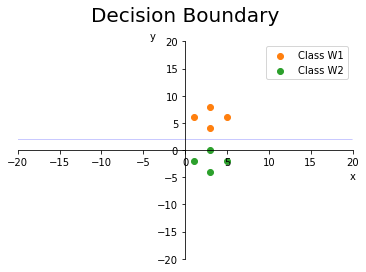

In [60]:
w1=np.array([[1,6],[3,4],[3,8],[5,6]])
w2=np.array([[3,0],[1,-2],[3,-4],[5,-2]])
pw1=0.5
pw2=0.5
get_result(w1,w2,pw1,pw2)

# Question 2
Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2)

ω1 = [1,-1; 2,-5; 3,-6; 4,-10; 5,-12; 6,-15]

ω2 = [-1,1; -2,5; -3,6; -4,10, -5,12; -6, 15]

Following are the covariance matrix of the given classes:

Class W1 Covariance Matrix:
 [[ 3.5        -9.5       ]
 [-9.5        26.16666667]] 

Class W2 Covariance Matrix:
 [[ 3.5        -9.5       ]
 [-9.5        26.16666667]] 

Case_2 of Baye's Decision Boundary(Since Covariance Matrices are equal but not of form 1):



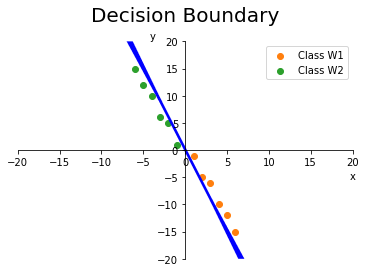

In [61]:
w1=np.array([[1,-1], [2,-5], [3,-6], [4,-10], [5,-12], [6,-15]])
w2=np.array([[-1,1], [-2,5], [-3,6], [-4,10], [-5,12], [-6,15]])
pw1=0.3
pw2=0.7
get_result(w1,w2,pw1,pw2)

# Question 3
Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2)

ω1 = [2,6; 3,4; 3,8; 4,6]

ω2 = [3,0; 1,-2; 3,-4; 5,-2]

Following are the covariance matrix of the given classes:

Class W1 Covariance Matrix:
 [[0.66666667 0.        ]
 [0.         2.66666667]] 

Class W2 Covariance Matrix:
 [[2.66666667 0.        ]
 [0.         2.66666667]] 

Case_3 of Baye's Decision Boundary(Since Covariance Matrices are not equal):



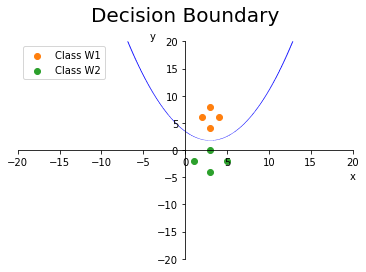

In [62]:
w1=np.array([[2,6], [3,4], [3,8], [4,6]])
w2=np.array([[3,0], [1,-2], [3,-4], [5,-2]])
pw1=0.5
pw2=0.5
get_result(w1,w2,pw1,pw2)